<a href="https://colab.research.google.com/github/Abdul2611/Glass-Classification-Using-RandomForest/blob/main/glass_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_excel("/content/glass12.xlsx")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [6]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
209,False
210,False
211,False
212,False


In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


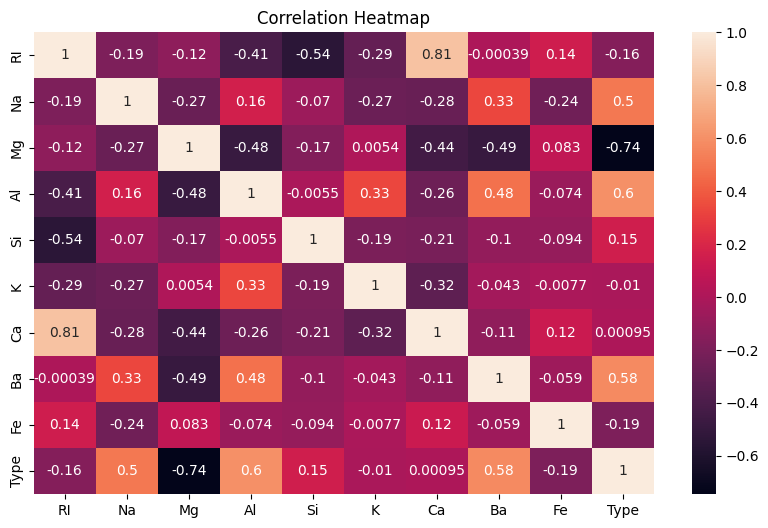

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

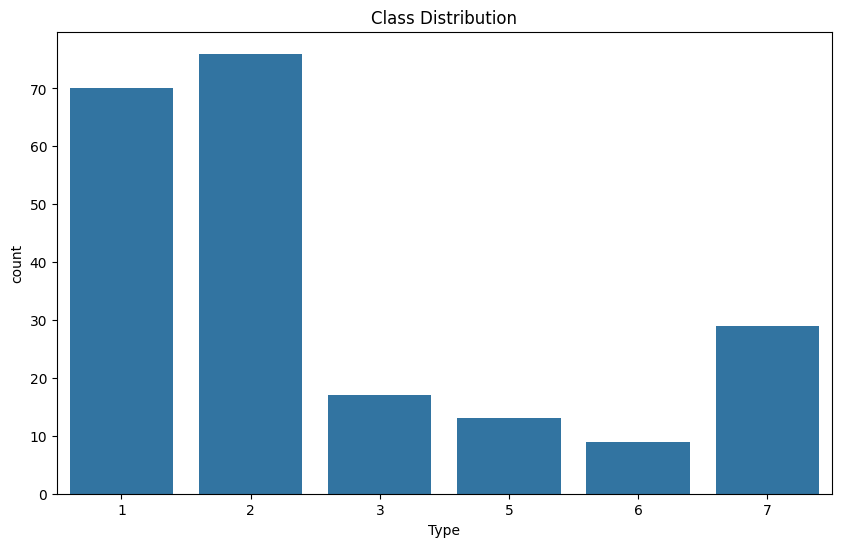

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Type'])
plt.title("Class Distribution")
plt.show()

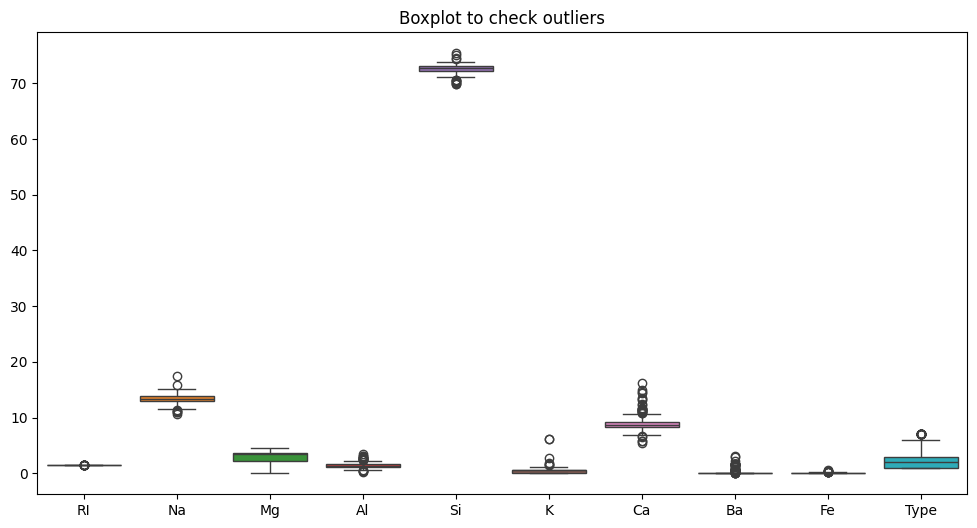

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot to check outliers")
plt.show()

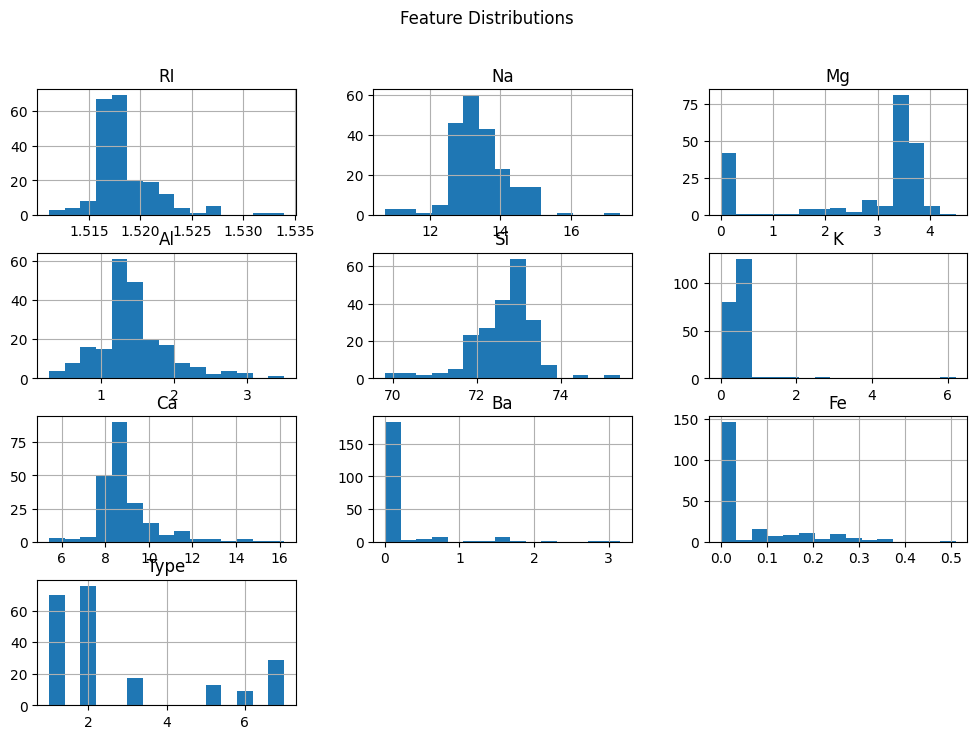

In [12]:
df.hist(figsize=(12, 8), bins=15)
plt.suptitle("Feature Distributions")
plt.show()

In [13]:
X = df.drop('Type', axis=1)
y = df['Type']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape,X_test.shape

((149, 9), (65, 9))

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [16]:
y_pred = classifier_rf.predict(X_test)

In [17]:
accurcy = accuracy_score(y_test, y_pred)
print("Accuracy:", accurcy)

Accuracy: 0.7384615384615385


In [18]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.89      0.74        19
           2       0.71      0.65      0.68        23
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         6
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00        10

    accuracy                           0.74        65
   macro avg       0.68      0.67      0.66        65
weighted avg       0.72      0.74      0.71        65



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[17  2  0  0  0  0]
 [ 7 15  0  0  1  0]
 [ 3  1  0  0  0  0]
 [ 0  3  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0 10]]


In [20]:
bag = BaggingClassifier(random_state=42)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print("Classification Report:\n", classification_report(y_test, y_pred_bag))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bag))

Accuracy: 0.7538461538461538
Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.89      0.77        19
           2       0.73      0.70      0.71        23
           3       1.00      0.25      0.40         4
           5       1.00      0.50      0.67         6
           6       1.00      0.67      0.80         3
           7       0.83      1.00      0.91        10

    accuracy                           0.75        65
   macro avg       0.87      0.67      0.71        65
weighted avg       0.78      0.75      0.74        65

Confusion Matrix:
 [[17  2  0  0  0  0]
 [ 6 16  0  0  0  1]
 [ 2  1  1  0  0  0]
 [ 0  3  0  3  0  0]
 [ 0  0  0  0  2  1]
 [ 0  0  0  0  0 10]]


In [21]:
boost = AdaBoostClassifier(random_state=42)
boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_boost))
print("Classification Report:\n", classification_report(y_test, y_pred_boost))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_boost))

Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.53      0.61        19
           2       0.48      0.61      0.54        23
           3       0.00      0.00      0.00         4
           5       0.67      0.33      0.44         6
           6       0.60      1.00      0.75         3
           7       0.83      1.00      0.91        10

    accuracy                           0.60        65
   macro avg       0.55      0.58      0.54        65
weighted avg       0.60      0.60      0.58        65

Confusion Matrix:
 [[10  9  0  0  0  0]
 [ 2 14  2  1  2  2]
 [ 2  2  0  0  0  0]
 [ 0  4  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0 10]]


In [22]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Random Forest', 'Bagging', 'AdaBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_bag), accuracy_score(y_test, y_pred_boost)]
})

display(results)

,Model,Accuracy
0,Random Forest,0.738462
1,Bagging,0.753846
2,AdaBoost,0.600000


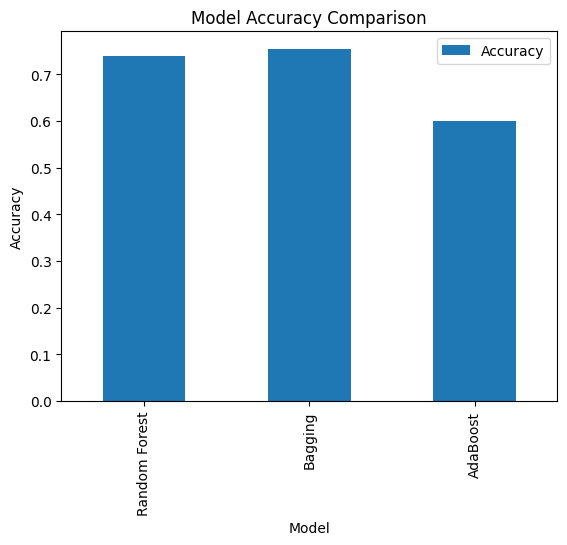

In [23]:
results.plot(x='Model', y='Accuracy', kind='bar')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()